In [25]:
import numpy as np
import matplotlib.pyplot as plt

### Angry bird trajectory simulation

In [26]:
# ###########################################
# Read the result from Fotran program

# FORMAT:
# data = np.loadtxt(<filename>).transpose()
# data[0] : Time
# data[1] : Position in x
# data[2] : Position in y
# #############################################

Euler    = np.loadtxt('./output/Euler.txt').transpose()
RK2      = np.loadtxt('./output/RK2.txt').transpose()
RK4      = np.loadtxt('./output/RK4.txt').transpose()

In [27]:
# Analytical solution
v     = 30
angle = np.deg2rad(60)
vx    =  v*np.cos(angle)
vy    =  v*np.sin(angle)
g     =  9.81

time      = np.linspace(0,7)
posx_anal = vx*time
posy_anal = vy*time - 0.5*g*time**2

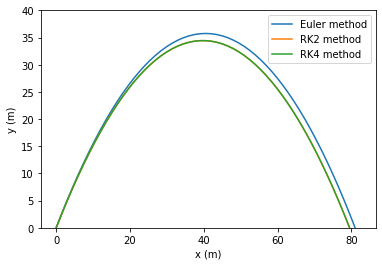

In [28]:
fig, ax = plt.subplots()

ax.set(
    xlabel='x (m)',
    ylabel='y (m)',
    ylim=[0,40]
)
# ax.plot(posx_anal,  posy_anal,  label='Analytical')
ax.plot(Euler[1], Euler[2], label='Euler method')
ax.plot(RK2[1],   RK2[2],   label='RK2 method')
ax.plot(RK4[1],   RK4[2],   label='RK4 method')

ax.legend()

In [29]:
(RK4 - RK2)[2]

array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 3.00454106e-15, 0.00000000e+00])

### Error in different simulation methods

In [37]:
def find_error(method):
    errors = []
    for output in ['./output/'+method+'_0.1E+01.txt', './output/'+method+'_0.1E+00.txt', \
                   './output/'+method+'_0.1E-01.txt', './output/'+method+'_0.1E-02.txt']:
        data = np.loadtxt(output).transpose()
        error = data[6].mean()
        errors.append(error)
    return errors

In [43]:
Euler_err = find_error('Euler')
RK2_err   = find_error('RK2')
RK4_err   = find_error('RK4')
dt = [1, 1e-1, 1e-2, 1e-3]

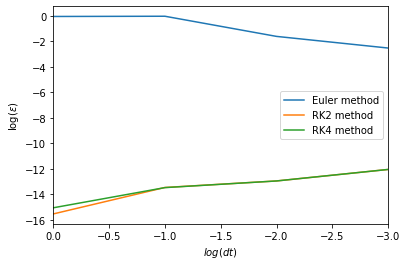

In [50]:
fig, ax = plt.subplots()

ax.set(
    xlabel='$log(dt)$',
    ylabel='log($\epsilon$)',
    xlim=[0, -3]
)
ax.plot(np.log10(dt), np.log10(Euler_err), label='Euler method')
ax.plot(np.log10(dt), np.log10(RK2_err),   label='RK2 method')
ax.plot(np.log10(dt), np.log10(RK4_err),   label='RK4 method')

ax.legend()

In [51]:
np.array(RK2_err) - np.array(RK4_err)

array([-6.05571740e-16,  8.52629137e-16, -5.42101982e-17, -9.69544069e-16])